#Image Crop

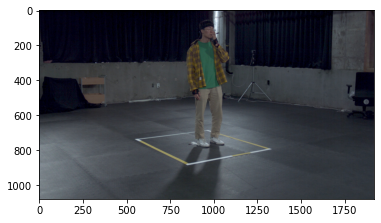

In [ ]:
import json

import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread('./smoke/image/image_action_45/image_45-1/45-1/45-1_001-C01/45-1_001-C01_009.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

In [ ]:
import numpy as np

# key point를 이용하여 첫 번째 이미지를 crop
fd = json.load(open('./smoke/image/image_action_45/image_45-1/45-1/45-1_001-C01/45-1_001-C01_2D.json'))
annotations = fd['annotations']

# 0번째 이미지의 annotation data
test_image_annotation = annotations[0]['keypoints']
print(test_image_annotation)
np.array(test_image_annotation).reshape(-1,3)

[931.0, 731.0, 2.0, 933.0, 583.0, 2.0, 941.0, 431.0, 2.0, 1016.0, 432.0, 2.0, 1023.0, 586.0, 2.0, 1010.0, 721.0, 2.0, 980.0, 429.0, 2.0, 971.0, 271.0, 2.0, 965.0, 165.0, 2.0, 967.0, 58.0, 2.0, 888.0, 440.0, 2.0, 874.0, 336.0, 2.0, 876.0, 233.0, 2.0, 1037.0, 219.0, 1.0, 1073.0, 276.0, 2.0, 1021.0, 193.0, 2.0]


array([[9.310e+02, 7.310e+02, 2.000e+00],
       [9.330e+02, 5.830e+02, 2.000e+00],
       [9.410e+02, 4.310e+02, 2.000e+00],
       [1.016e+03, 4.320e+02, 2.000e+00],
       [1.023e+03, 5.860e+02, 2.000e+00],
       [1.010e+03, 7.210e+02, 2.000e+00],
       [9.800e+02, 4.290e+02, 2.000e+00],
       [9.710e+02, 2.710e+02, 2.000e+00],
       [9.650e+02, 1.650e+02, 2.000e+00],
       [9.670e+02, 5.800e+01, 2.000e+00],
       [8.880e+02, 4.400e+02, 2.000e+00],
       [8.740e+02, 3.360e+02, 2.000e+00],
       [8.760e+02, 2.330e+02, 2.000e+00],
       [1.037e+03, 2.190e+02, 1.000e+00],
       [1.073e+03, 2.760e+02, 2.000e+00],
       [1.021e+03, 1.930e+02, 2.000e+00]])

In [ ]:
# annotation data의 max와 min point를 가져온 후 이미지 잘림 방지를 위해 각각의 크기에 100을 더해주고 빼줌
max_point = np.max(np.array(test_image_annotation).reshape(-1, 3), axis=0).astype(int) + 100
min_point = np.min(np.array(test_image_annotation).reshape(-1, 3), axis=0).astype(int) - 100

max_point = max_point[:-1]
min_point = min_point[:-1]

max_x, max_y = max_point
min_x, min_y = min_point

# 데이터 포인트의 크기가 원 이미지를 넘어서는 경우를 방지
max_x = max_x if max_x < 1920 else 1920
max_y = max_y if max_y < 1080 else 1080
min_x = min_x if min_x > 0 else 0
min_y = min_y if min_y > 0 else 0

print(max_x, max_y)
print(min_x, min_y)

1173 831
774 0


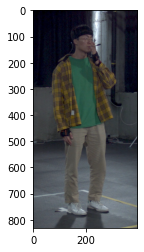

In [ ]:
crop_image = test_image[min_y:max_y, min_x:max_x]
plt.imshow(crop_image)
plt.show()

# 6, 7, 8을 제외한 Keypoint 값 이미지에 출력

In [ ]:
import json
import numpy as np

import cv2
import matplotlib.pyplot as plt

fd = json.load(open('./smoke/image/image_action_45/image_45-1/45-1/45-1_001-C01/45-1_001-C01_2D.json'))
annotations = fd['annotations']
test_image_annotation = annotations[0]['keypoints']

for i in range(9):
    del test_image_annotation[17]

blue_color = (255, 0, 0)

test_image = cv2.imread('./smoke/image/image_action_45/image_45-1/45-1/45-1_001-C01/45-1_001-C01_009.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)
plt.show()

for n,i in enumerate(test_image_annotation) :
    if n%3==2:
        img = cv2.circle(test_image, (int(test_image_annotation[n-2]), int(test_image_annotation[n-1])), 5,blue_color , 2)
#         print(f'{test_image_annotation[n-2]},{test_image_annotation[n-1]}')
plt.imshow(img)